In [1]:
import numpy as np

from vae_flatten import VAEModel
from load_data import load_mnist

## Load data

In [2]:
X_train, y_train, X_test, y_test = load_mnist(binarize=False)

## Train VAE

In [3]:
model = VAEModel(latent_dim=2, beta=1)

Epoch 0: error = 179.121
Epoch 10: error = 146.4335
Epoch 20: error = 158.1441
Epoch 30: error = 146.1869
Epoch 40: error = 143.7831
Epoch 50: error = 141.9426
Epoch 60: error = 140.7583
Epoch 70: error = 140.4575
Epoch 80: error = 139.1136
Epoch 90: error = 138.3938
Epoch 100: error = 137.9464
Epoch 110: error = 138.4754
Epoch 120: error = 137.0032
Epoch 130: error = 137.8391
Epoch 140: error = 137.5823
Epoch 150: error = 137.0002
Epoch 160: error = 137.1765
Epoch 170: error = 136.0064
Epoch 180: error = 136.4324
Epoch 190: error = 137.4834
Epoch 200: error = 136.4128
Epoch 210: error = 135.5019
Epoch 220: error = 135.7936
Epoch 230: error = 135.598
Epoch 240: error = 137.9001
Epoch 250: error = 135.6659
Epoch 260: error = 135.5249
Epoch 270: error = 136.7468
Epoch 280: error = 136.1409
Epoch 290: error = 135.5215
Epoch 300: error = 135.408
Epoch 310: error = 135.5615
Epoch 320: error = 136.0119
Epoch 330: error = 135.1695
Epoch 340: error = 134.6377
Epoch 350: error = 135.36
Epoch 36

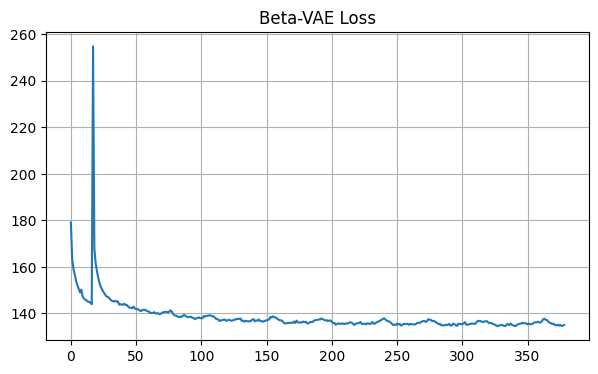

In [4]:
_ = model.train_vae(X_train, 1000, learning_rate=3e-3, batch_size=256, print_error_every=10, patience=50)

Test loss = 144.5569


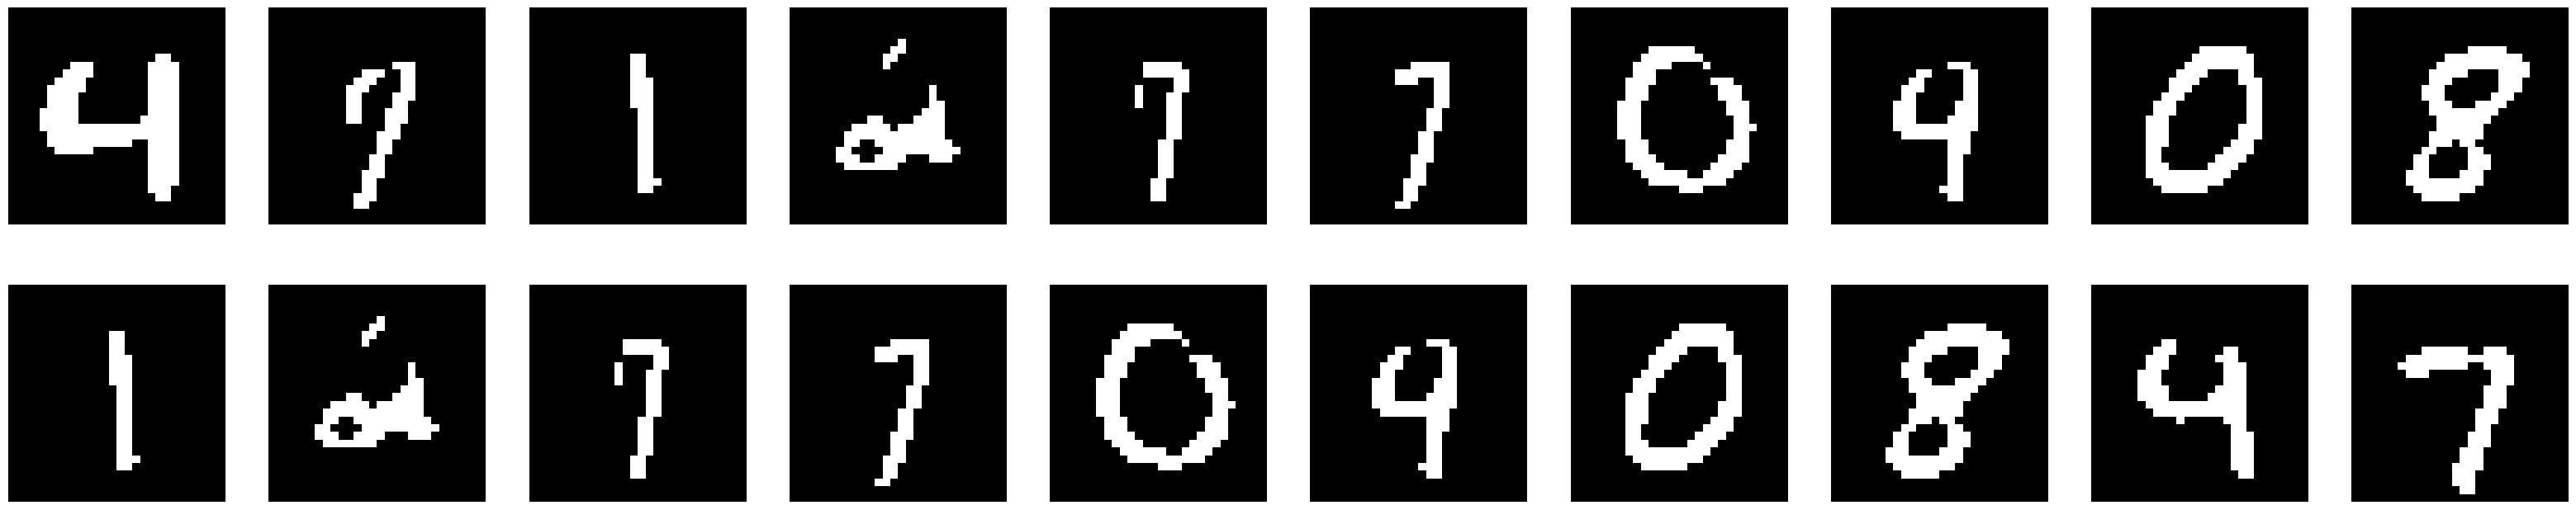

In [5]:
l, r = model.test_vae(X_test, ncols=10, nb_to_plot=20)

## Generate new samples

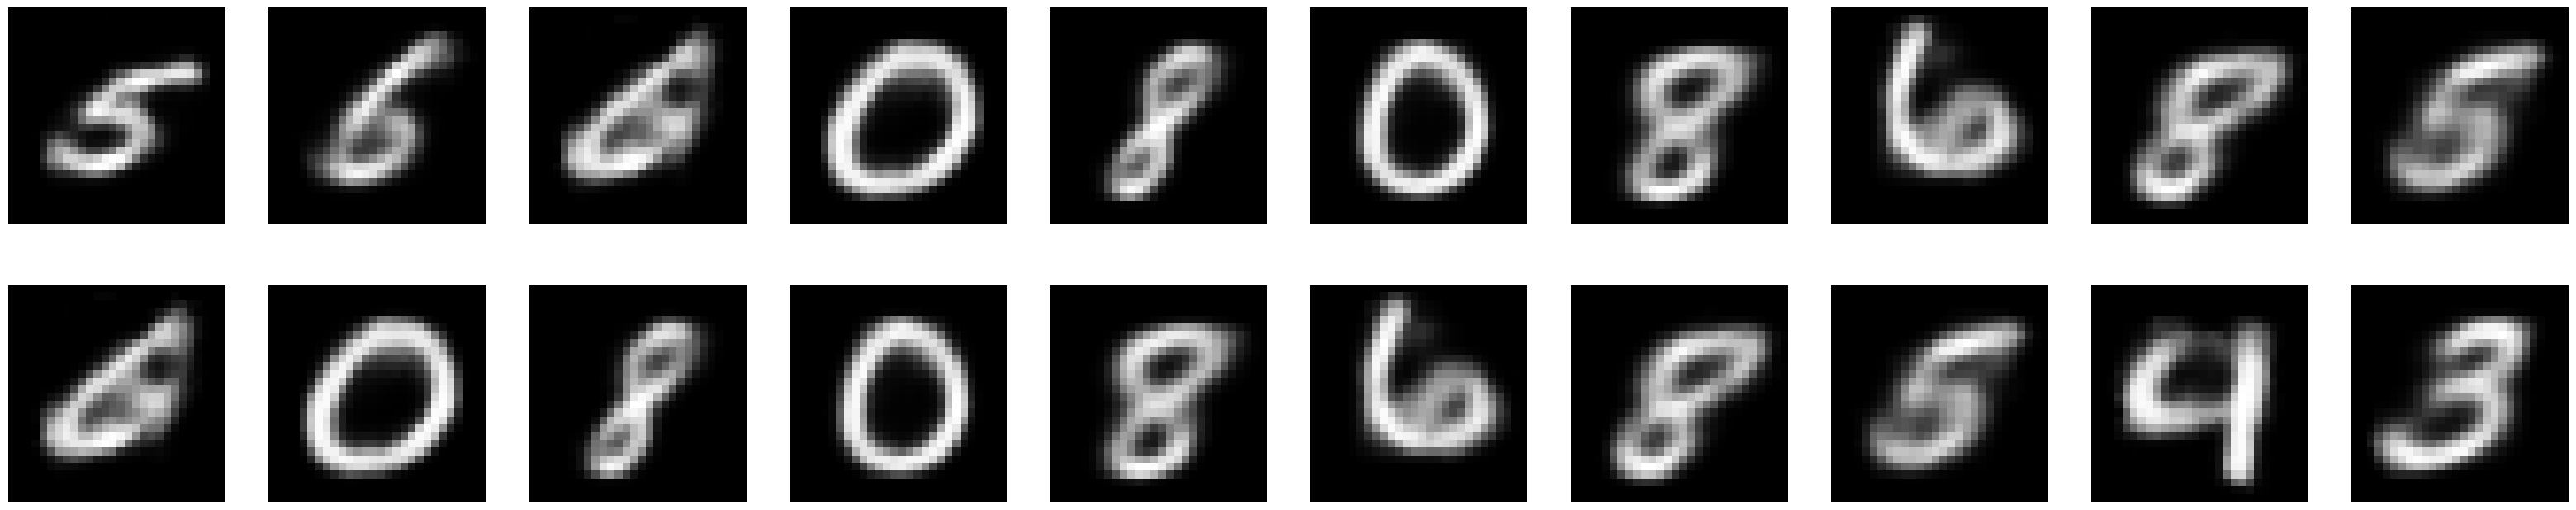

In [6]:
### plot images generated as gray scale ### 
gen = model.generate_data(binary=False)

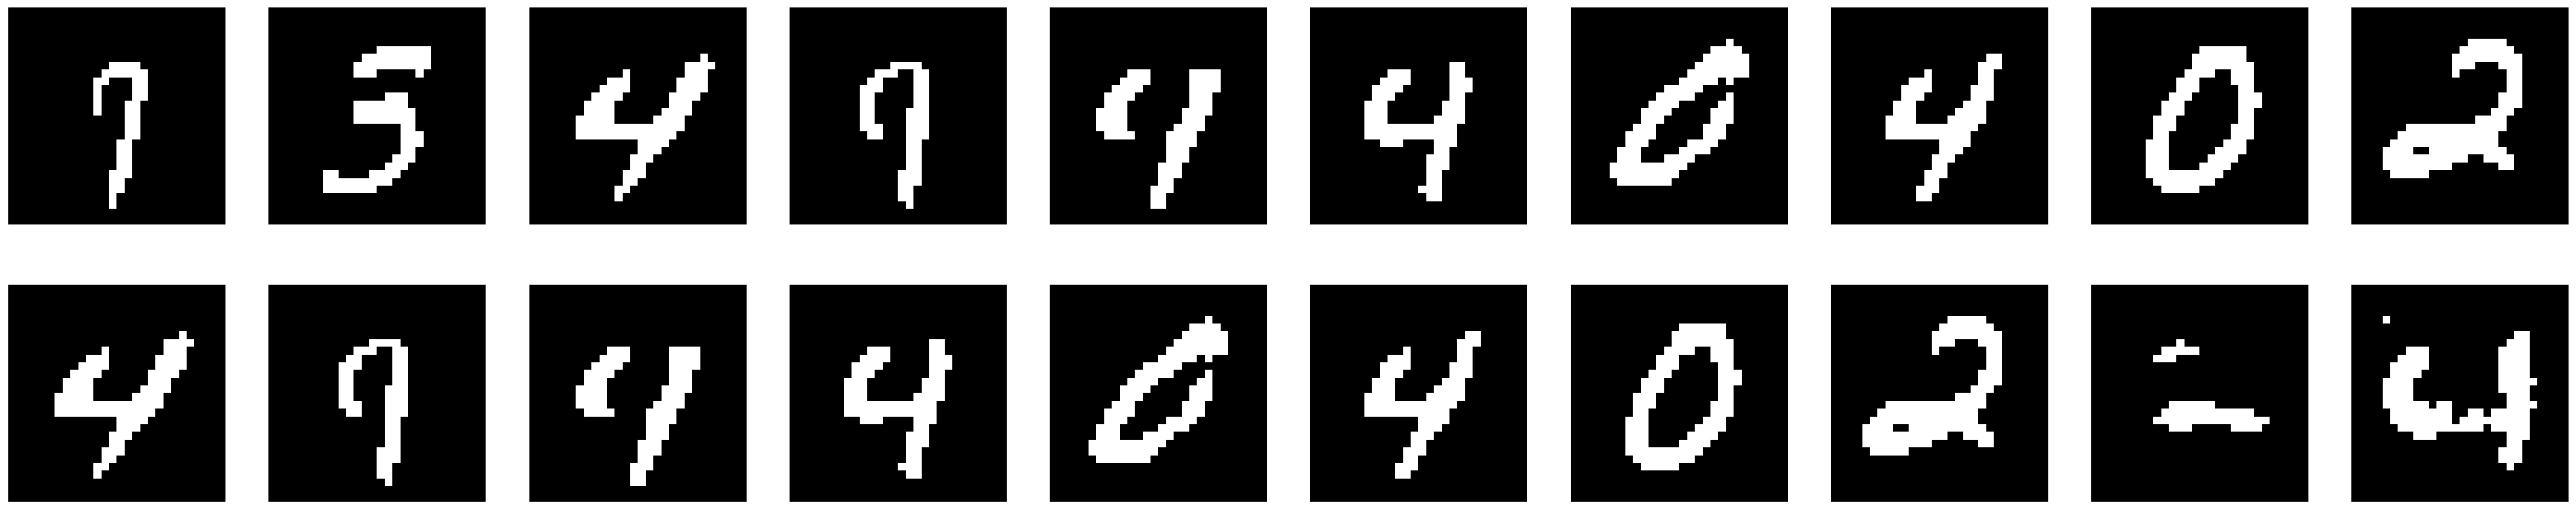

In [7]:
### plot images generated as binary images ### 
gen = model.generate_data()

model.compute_fid_score(X_test, batch_size=256)

### Sample latent space

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [9]:
samples = np.random.normal(size=(100_000, model.latent_dim))
samples_norm = {}
for i, sample in enumerate(samples):
    samples_norm[i] = np.linalg.norm(sample)
sorted_samples_norm = sorted(samples_norm.items(), key=lambda item: item[1])
idx_to_select = np.linspace(0, len(samples)-1, 100, dtype=int)
idx = (np.array(sorted_samples_norm)[:, 0][idx_to_select]).astype(int)

In [10]:
grid = samples[idx]
latent_space_traversal = model.generate_samples(samples_pz=torch.tensor(grid, dtype=torch.float32).to(model.device))['generations'].detach().cpu().numpy()
latent_space_traversal = latent_space_traversal.squeeze()

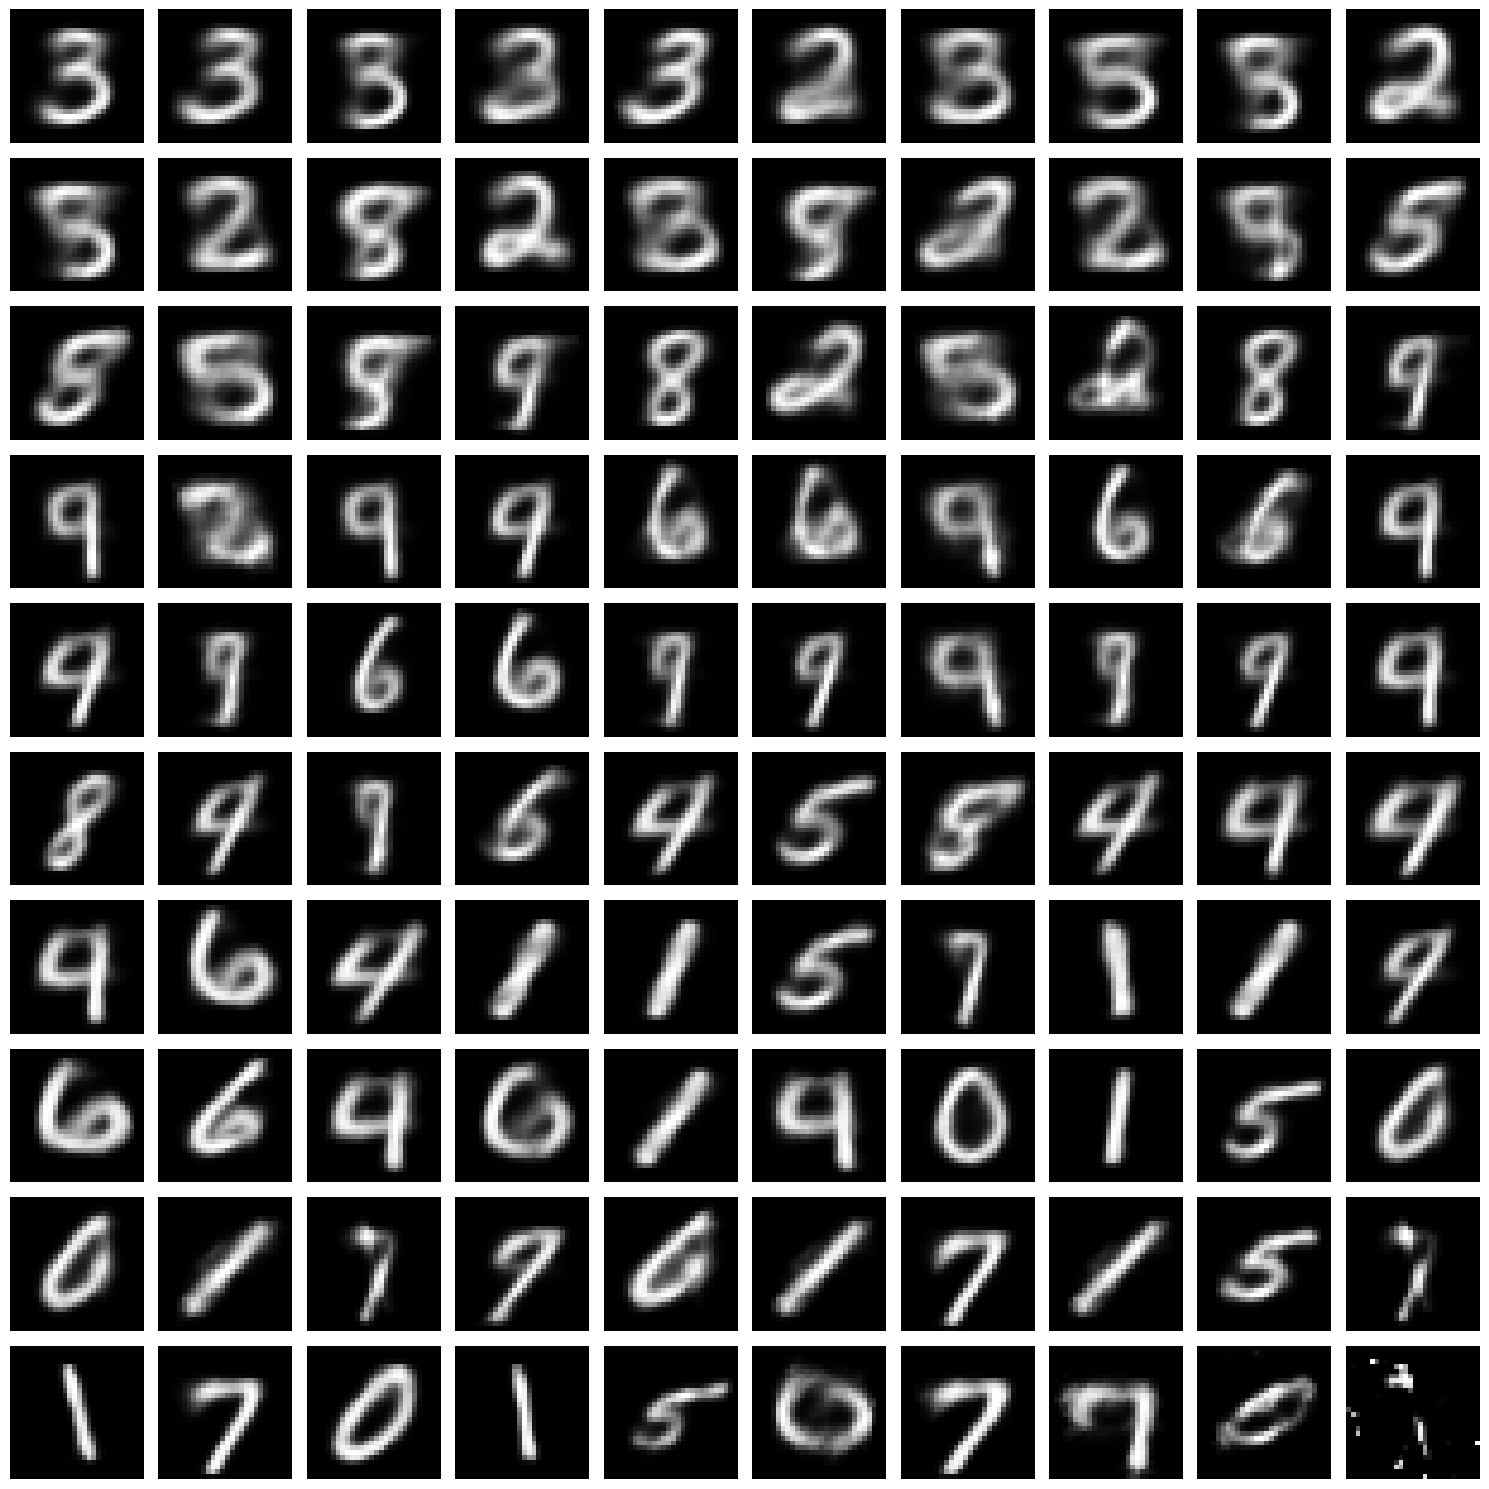

In [11]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

for i in range(10):
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(latent_space_traversal[10*i+j].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.tight_layout();